<a href="https://colab.research.google.com/github/alibagheribardi/Regression/blob/main/wine_Regression_Modification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔎 Feature Group Performance Summary (Wine dataset):
                         Feature  R2_Score
6                     flavanoids  0.825057
11  od280/od315_of_diluted_wines  0.733635
10                           hue  0.638075
5                  total_phenols  0.634689
12                       proline  0.613620
8                proanthocyanins  0.529346
1                     malic_acid  0.509783
9                color_intensity  0.397292
3              alcalinity_of_ash  0.392402
0                        alcohol  0.314524
7           nonflavanoid_phenols  0.253576
2                            ash  0.182846
4                      magnesium  0.163282

📊 Grouped Feature R² Scores:
               Feature_Group  R2_Score
0               All Features  0.674568
1            Strong Features  0.825057
2  Medium Features (0.7-0.8)  0.733635
3  Medium Features (0.6-0.7)  0.664786
4  Medium Features (0.5-0.6)  0.607224
5  Medium Features (0.4-0.5)       NaN
6  Medium Features (0.3-0.4)  0.687360
7  M

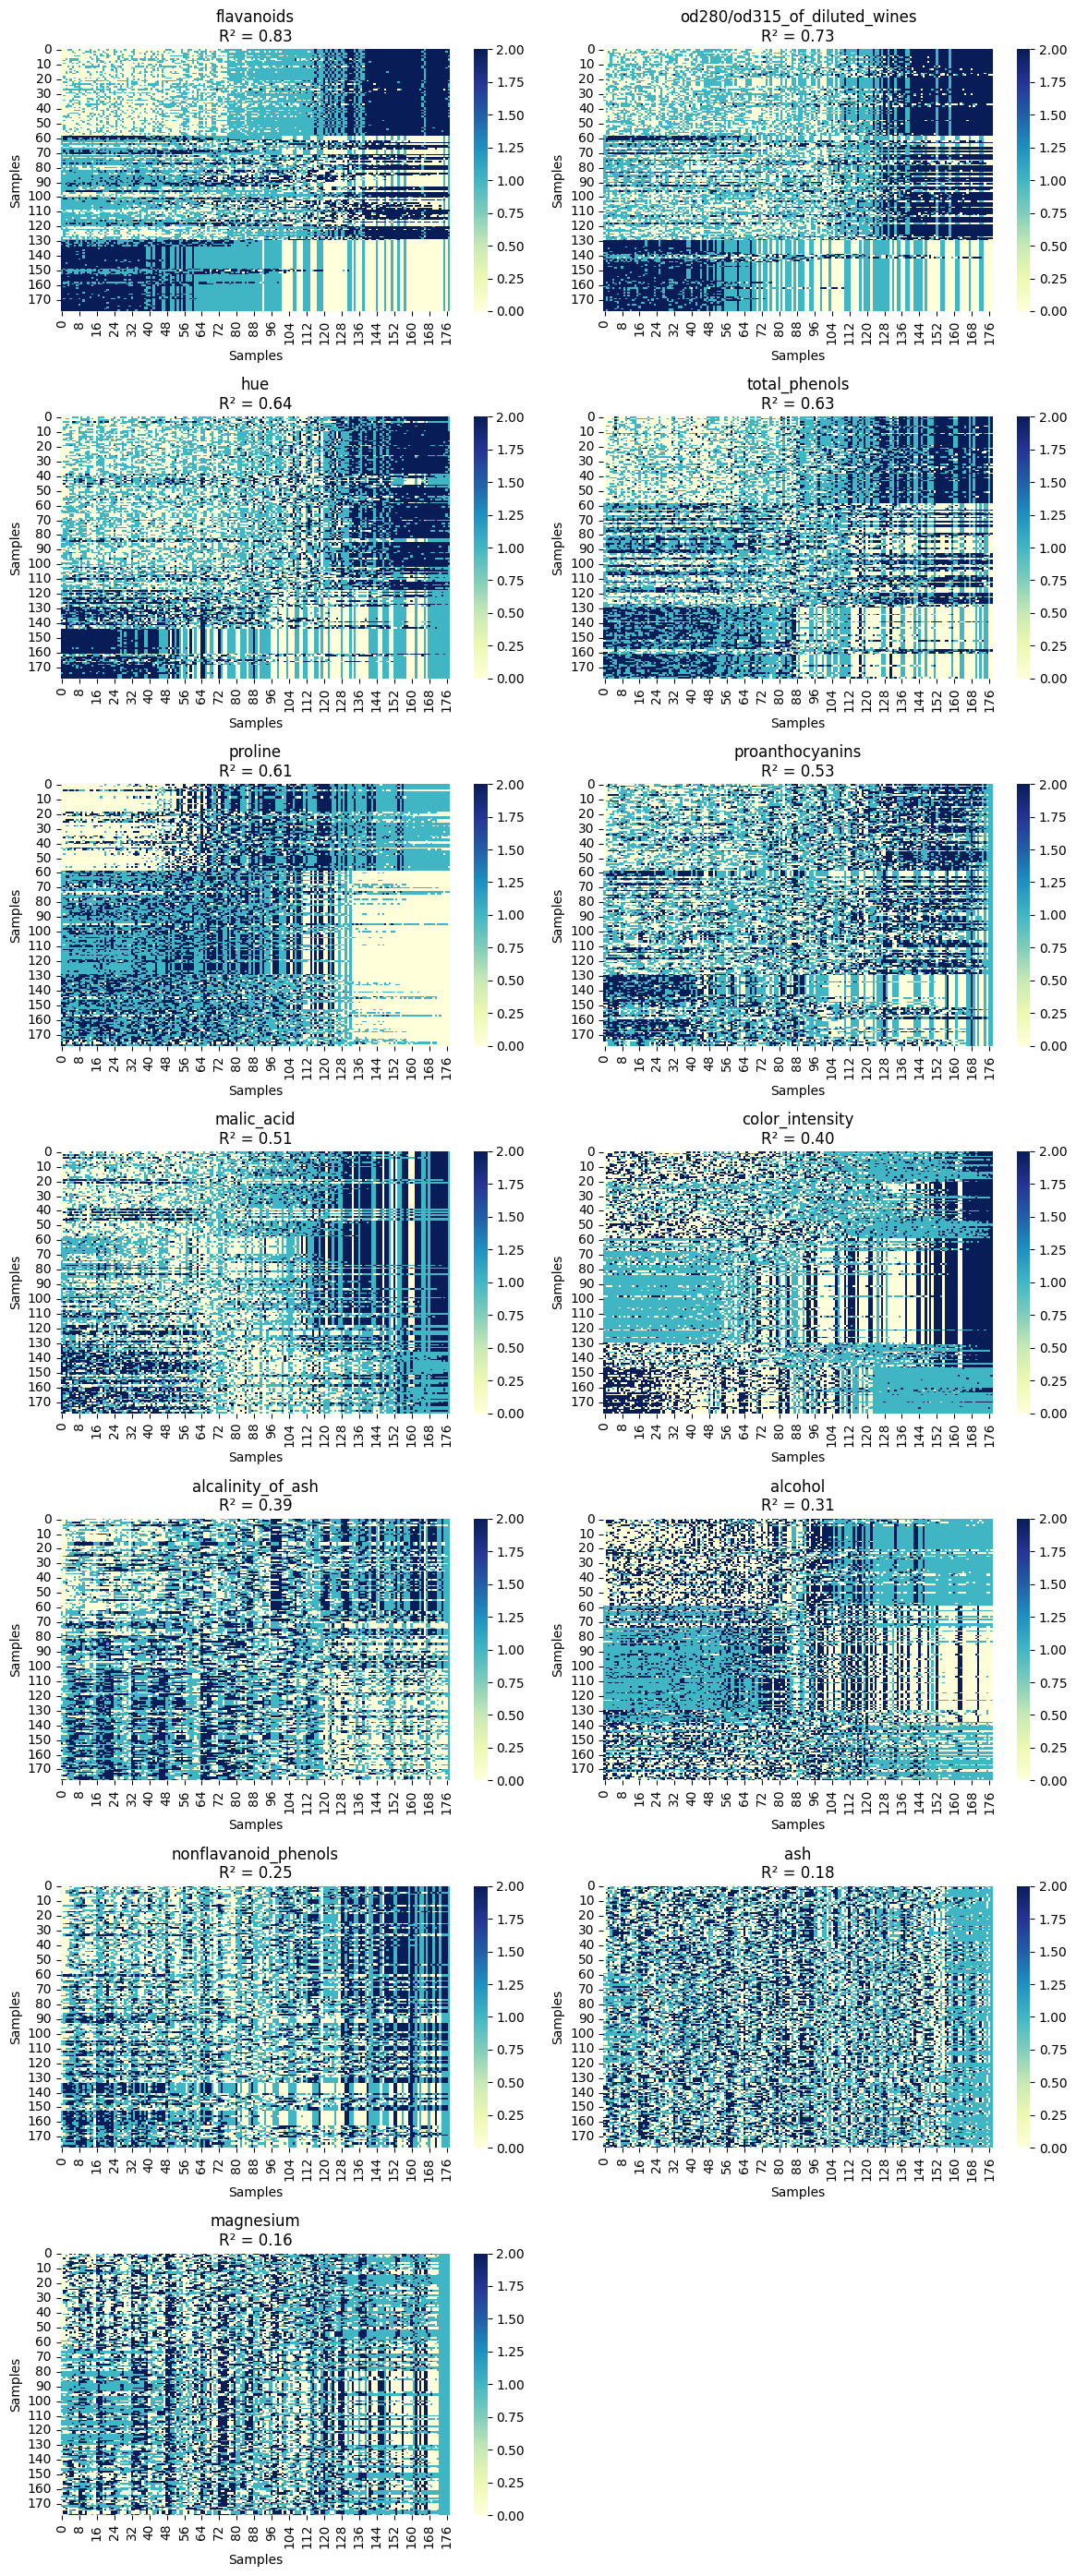

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_wine

# Function to prioritize features based on KNN R² score
def features_prioritization(X, y, features):
    features_scores = []
    knn_reg = KNeighborsRegressor()

    for feature in features:
        X_feature = X[[feature]]  # Ensure 2D
        knn_reg.fit(X_feature, y)
        r2 = knn_reg.score(X_feature, y)
        features_scores.append((feature, r2))

    df_scores = pd.DataFrame(features_scores, columns=['Feature', 'R2_Score']).sort_values(by='R2_Score', ascending=False)
    return df_scores

# Load wine dataset
wine = load_wine()
X_wine = pd.DataFrame(wine.data, columns=wine.feature_names)  # Convert to DataFrame
y_wine = wine.target
wine_features = wine.feature_names

# Run feature prioritization for the Wine dataset
wine_scores = features_prioritization(X_wine, y_wine, wine_features)
print("🔎 Feature Group Performance Summary (Wine dataset):")
print(wine_scores)  # Categorize features by R² score

# Categorizing features by R² score into multiple levels
strong_features = wine_scores[wine_scores['R2_Score'] > 0.8]['Feature'].tolist()
medium_features_1 = wine_scores[(wine_scores['R2_Score'] > 0.7) & (wine_scores['R2_Score'] <= 0.8)]['Feature'].tolist()
medium_features_2 = wine_scores[(wine_scores['R2_Score'] > 0.6) & (wine_scores['R2_Score'] <= 0.7)]['Feature'].tolist()
medium_features_3 = wine_scores[(wine_scores['R2_Score'] > 0.5) & (wine_scores['R2_Score'] <= 0.6)]['Feature'].tolist()
medium_features_4 = wine_scores[(wine_scores['R2_Score'] > 0.4) & (wine_scores['R2_Score'] <= 0.5)]['Feature'].tolist()
medium_features_5 = wine_scores[(wine_scores['R2_Score'] > 0.3) & (wine_scores['R2_Score'] <= 0.4)]['Feature'].tolist()
medium_features_6 = wine_scores[(wine_scores['R2_Score'] > 0.2) & (wine_scores['R2_Score'] <= 0.3)]['Feature'].tolist()
poor_features = wine_scores[wine_scores['R2_Score'] <= 0.2]['Feature'].tolist()

# Function to safely compute KNN R² score
def knn_score(X, y, selected_features):
    if not selected_features:  # Handle empty groups
        return np.nan
    model = KNeighborsRegressor()
    X_subset = X[selected_features]
    model.fit(X_subset, y)
    return model.score(X_subset, y)

# Compute R² scores for groups
r2_all = knn_score(X_wine, y_wine, wine_features)
r2_strong = knn_score(X_wine, y_wine, strong_features)
r2_medium_1 = knn_score(X_wine, y_wine, medium_features_1)
r2_medium_2 = knn_score(X_wine, y_wine, medium_features_2)
r2_medium_3 = knn_score(X_wine, y_wine, medium_features_3)
r2_medium_4 = knn_score(X_wine, y_wine, medium_features_4)
r2_medium_5 = knn_score(X_wine, y_wine, medium_features_5)
r2_medium_6 = knn_score(X_wine, y_wine, medium_features_6)
r2_poor = knn_score(X_wine, y_wine, poor_features)

# Summary DataFrame for R² scores
summary_df = pd.DataFrame({
    'Feature_Group': ['All Features', 'Strong Features', 'Medium Features (0.7-0.8)', 'Medium Features (0.6-0.7)',
                      'Medium Features (0.5-0.6)', 'Medium Features (0.4-0.5)', 'Medium Features (0.3-0.4)',
                      'Medium Features (0.2-0.3)', 'Poor Features'],
    'R2_Score': [r2_all, r2_strong, r2_medium_1, r2_medium_2, r2_medium_3, r2_medium_4, r2_medium_5, r2_medium_6, r2_poor]
})
print("\n📊 Grouped Feature R² Scores:")
print(summary_df)

# Heatmap visualization with R² in titles
def id_matrix(X, y, features, scores_dict):
    n_plots = len(features)
    n_rows = (n_plots + 1) // 2
    fig, axes = plt.subplots(n_rows, 2, figsize=(12, 4 * n_rows))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        values = X[feature].values.reshape(-1, 1)
        dist_mat = np.abs(values - values.T)
        sorted_indices = np.argsort(dist_mat, axis=1)
        nearest_labels = y[sorted_indices]

        sns.heatmap(nearest_labels, annot=False, cmap='YlGnBu', cbar=True, ax=axes[i])
        r2_val = scores_dict.get(feature, None)
        title = f'{feature}\nR² = {r2_val:.2f}' if r2_val is not None else feature
        axes[i].set_title(title)
        axes[i].set_xlabel('Samples')
        axes[i].set_ylabel('Samples')

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Create dictionary for R² lookups
r2_dict = dict(zip(wine_scores['Feature'], wine_scores['R2_Score']))

# Plot sorted heatmaps
id_matrix(X_wine, y_wine, wine_scores['Feature'].tolist(), r2_dict)


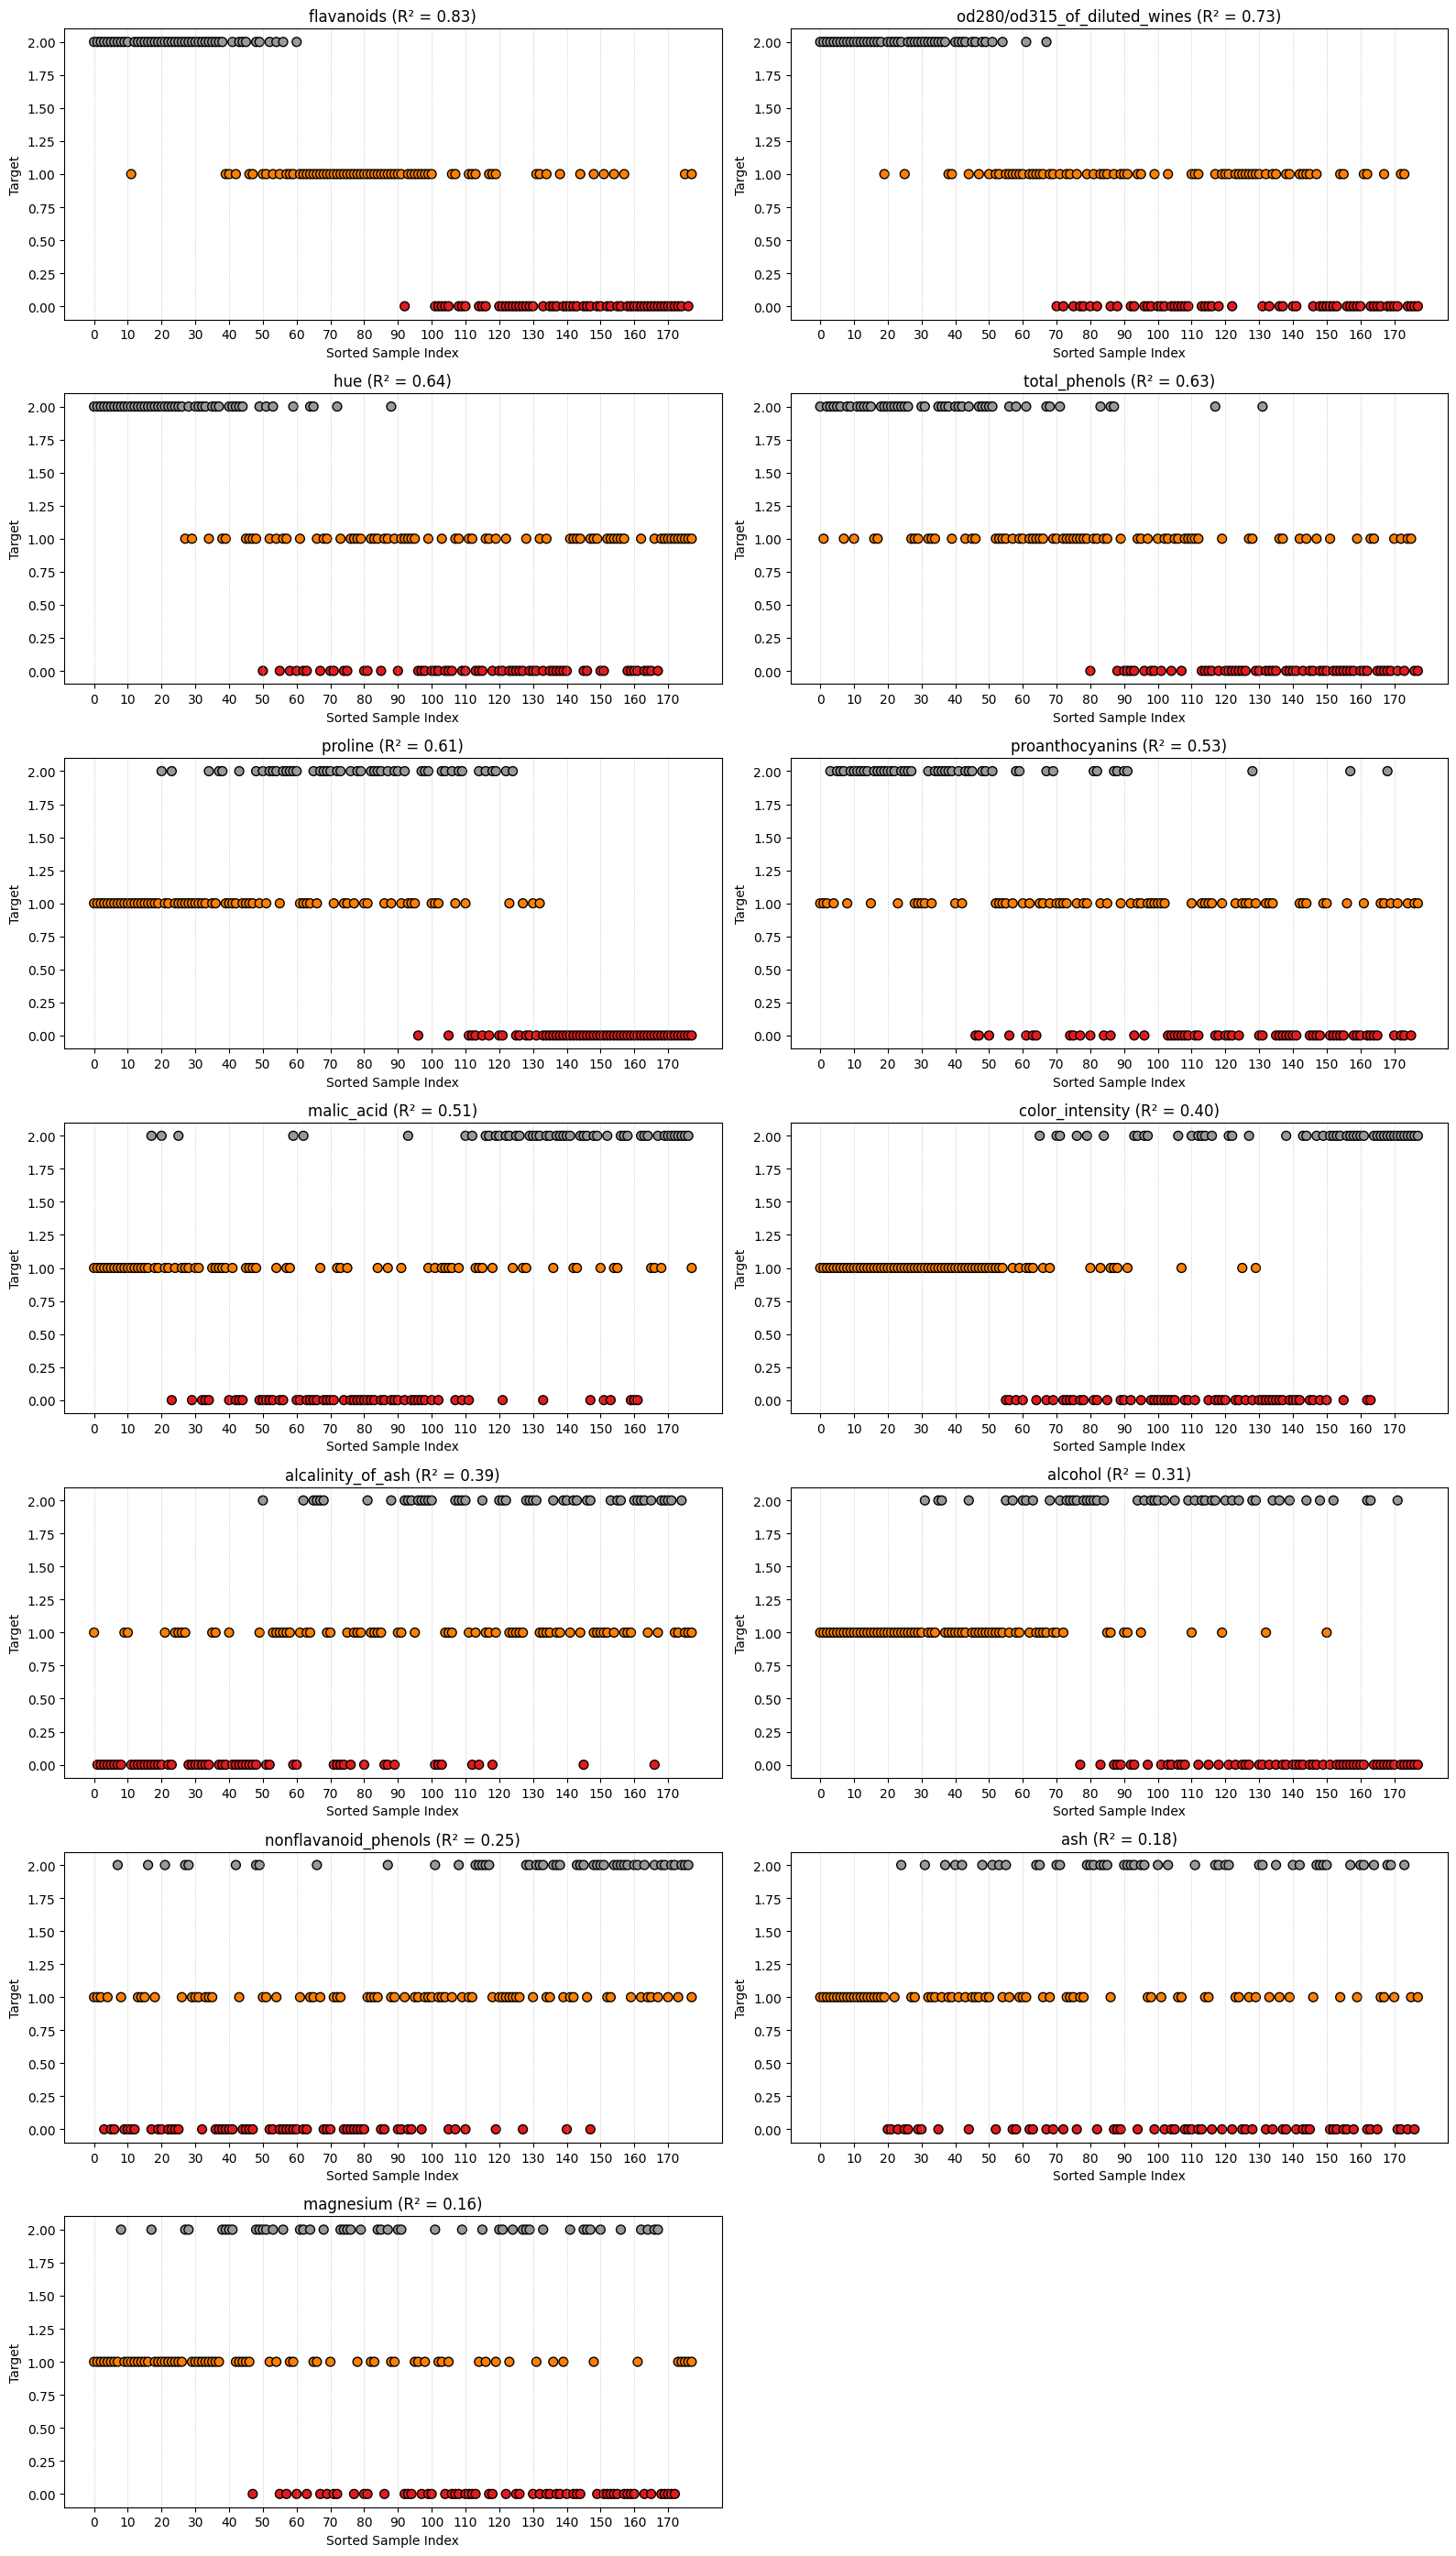

In [ ]:
def plot_feature_vs_target_indexed_grid(X, y, df_scores):
    features_sorted = df_scores['Feature'].tolist()
    n_features = len(features_sorted)
    n_rows = (n_features + 1) // 2

    fig, axes = plt.subplots(n_rows, 2, figsize=(16, 4 * n_rows))
    axes = axes.flatten()

    n_samples = len(X)

    for i, feature in enumerate(features_sorted):
        values = X[feature].values
        indices = np.argsort(values)
        x_axis = np.arange(n_samples)  # Sequential indices
        y_axis = y[indices]

        ax = axes[i]
        ax.scatter(x_axis, y_axis, c=y_axis, cmap='Set1', edgecolor='k', s=50)
        ax.set_title(f"{feature} (R² = {df_scores.loc[df_scores['Feature'] == feature, 'R2_Score'].values[0]:.2f})")
        ax.set_xlabel("Sorted Sample Index")
        ax.set_ylabel("Target")

        # Add vertical gridlines for each point
        ax.set_xticks(np.arange(0, n_samples, 1))
        ax.grid(True, axis='x', linestyle='--', linewidth=0.4, alpha=0.7)

        # Optional: Reduce number of xtick labels to avoid clutter
        if n_samples > 40:
            ax.set_xticks(np.arange(0, n_samples, 10))
            ax.set_xticklabels(np.arange(0, n_samples, 10))

    # Remove unused subplots if number of features is odd
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Call the updated function
plot_feature_vs_target_indexed_grid(X_wine, y_wine, wine_scores)


🔎 Feature Group Performance Summary (Wine dataset):
                         Feature  R2_Score
6                     flavanoids  0.825057
11  od280/od315_of_diluted_wines  0.733635
10                           hue  0.638075
5                  total_phenols  0.634689
12                       proline  0.613620
8                proanthocyanins  0.529346
1                     malic_acid  0.509783
9                color_intensity  0.397292
3              alcalinity_of_ash  0.392402
0                        alcohol  0.314524
7           nonflavanoid_phenols  0.253576
2                            ash  0.182846
4                      magnesium  0.163282

📊 Grouped Feature Performance Summary (R² and Accuracy):
               Feature_Group  R2_Score  Accuracy
0               All Features  0.674568  0.786517
1            Strong Features  0.825057  0.842697
2  Medium Features (0.7-0.8)  0.733635  0.769663
3  Medium Features (0.6-0.7)  0.664786  0.792135
4  Medium Features (0.5-0.6)  0.607224  0.7

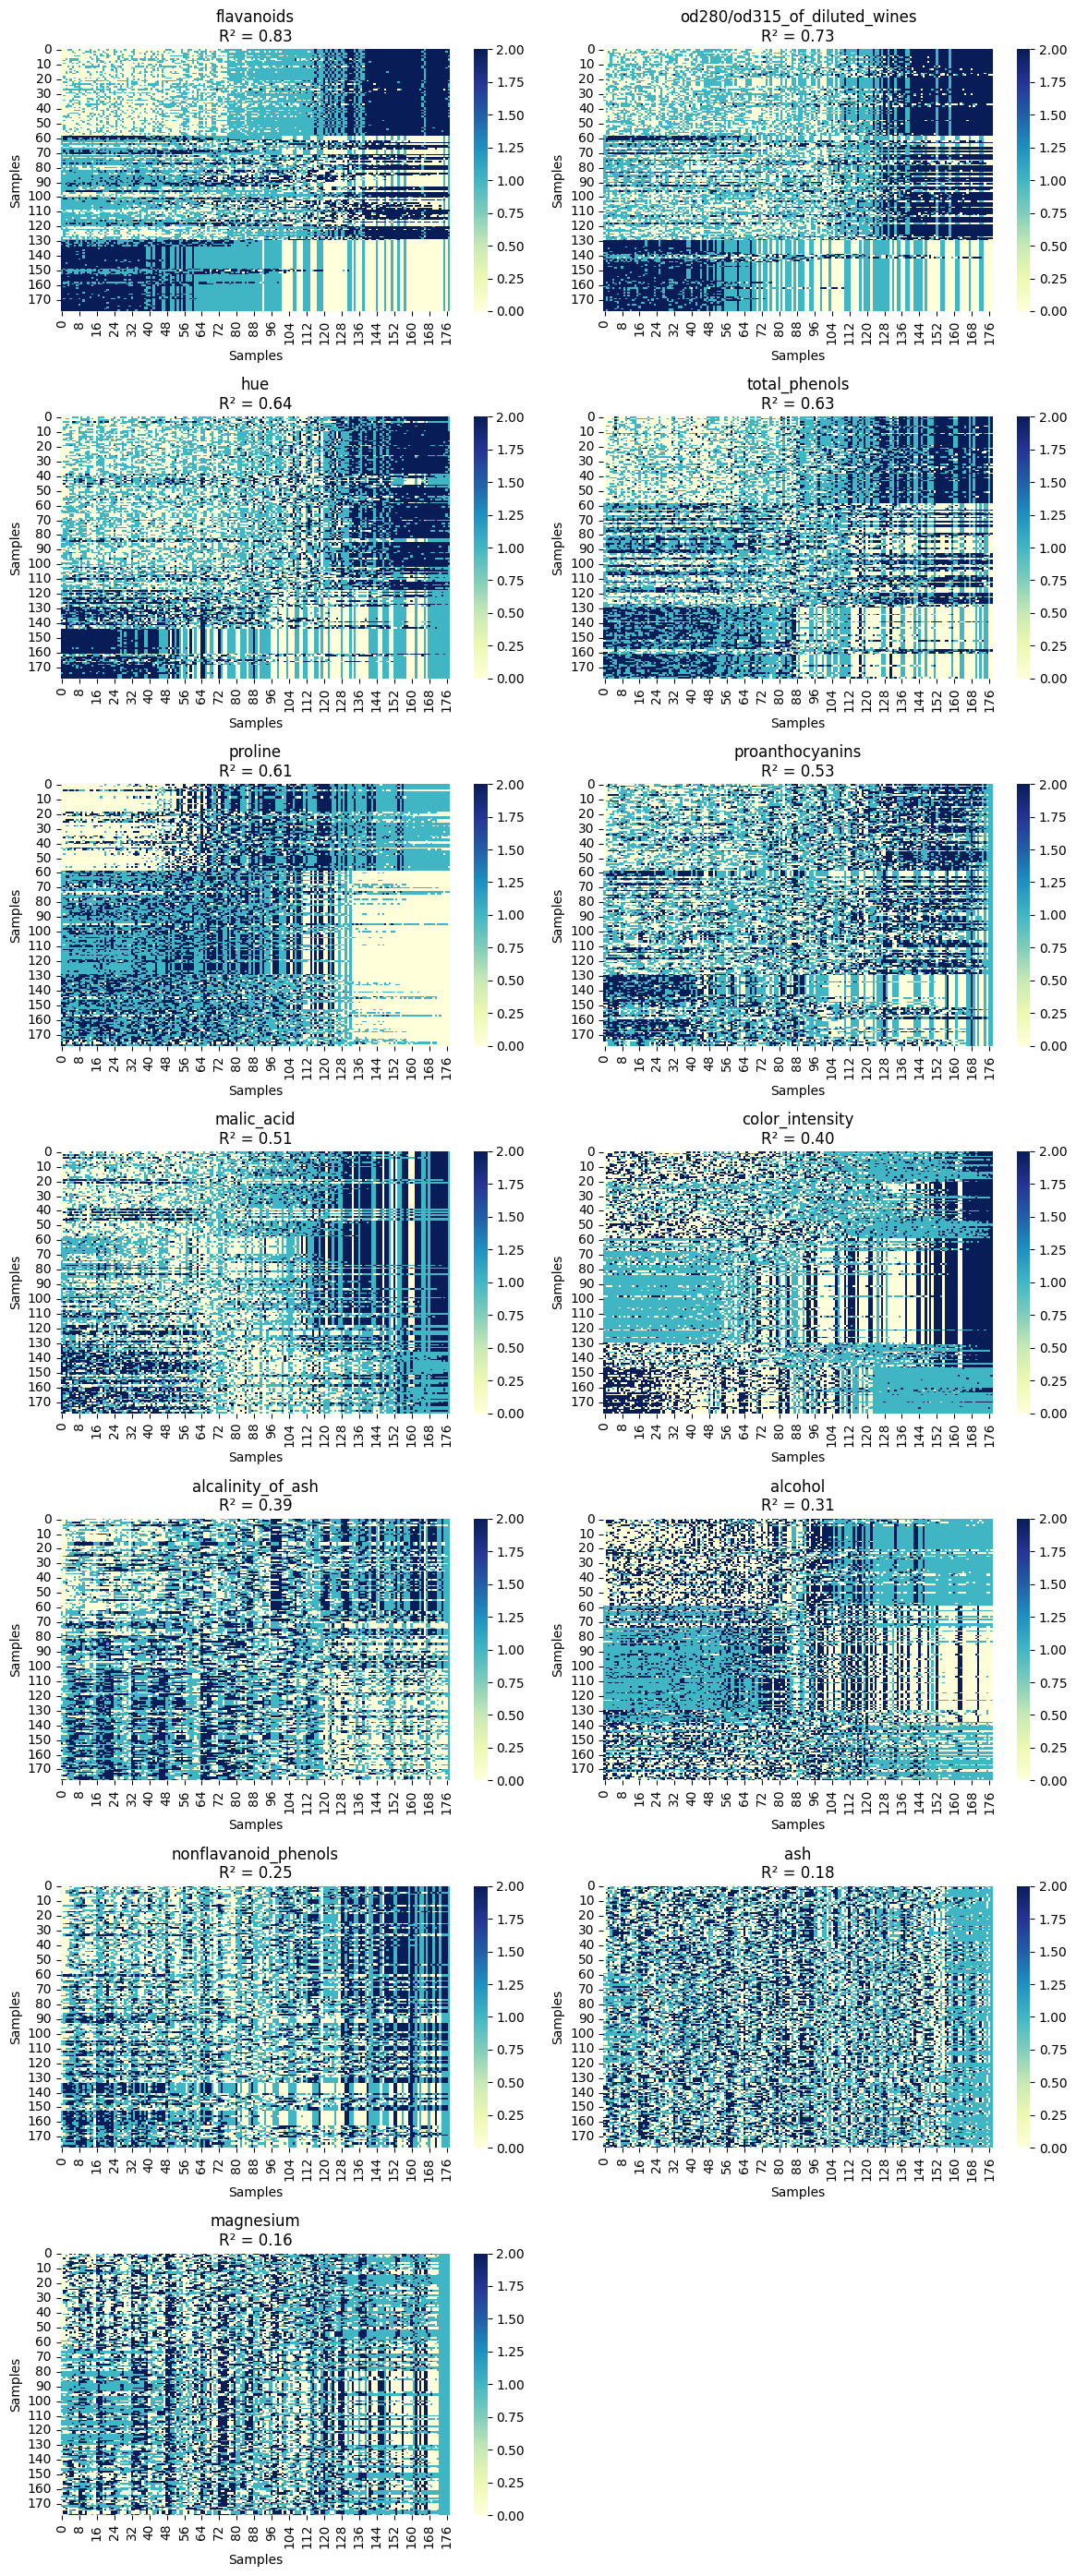

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score

# Function to prioritize features based on KNN R² score
def features_prioritization(X, y, features):
    features_scores = []
    knn_reg = KNeighborsRegressor()

    for feature in features:
        X_feature = X[[feature]]
        knn_reg.fit(X_feature, y)
        r2 = knn_reg.score(X_feature, y)
        features_scores.append((feature, r2))

    df_scores = pd.DataFrame(features_scores, columns=['Feature', 'R2_Score']).sort_values(by='R2_Score', ascending=False)
    return df_scores

# Function to compute KNN R² score for feature group
def knn_score(X, y, selected_features):
    if not selected_features:
        return np.nan
    model = KNeighborsRegressor()
    X_subset = X[selected_features]
    model.fit(X_subset, y)
    return model.score(X_subset, y)

# Function to compute KNN classification accuracy for feature group
def knn_accuracy(X, y, selected_features):
    if not selected_features:
        return np.nan
    model = KNeighborsClassifier()
    X_subset = X[selected_features]
    model.fit(X_subset, y)
    y_pred = model.predict(X_subset)
    return accuracy_score(y, y_pred)

# Load Wine dataset
wine = load_wine()
X_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
y_wine = wine.target
wine_features = wine.feature_names

# Prioritize features
wine_scores = features_prioritization(X_wine, y_wine, wine_features)
print("🔎 Feature Group Performance Summary (Wine dataset):")
print(wine_scores)

# Categorize features by R² scores
strong_features = wine_scores[wine_scores['R2_Score'] > 0.8]['Feature'].tolist()
medium_features_1 = wine_scores[(wine_scores['R2_Score'] > 0.7) & (wine_scores['R2_Score'] <= 0.8)]['Feature'].tolist()
medium_features_2 = wine_scores[(wine_scores['R2_Score'] > 0.6) & (wine_scores['R2_Score'] <= 0.7)]['Feature'].tolist()
medium_features_3 = wine_scores[(wine_scores['R2_Score'] > 0.5) & (wine_scores['R2_Score'] <= 0.6)]['Feature'].tolist()
medium_features_4 = wine_scores[(wine_scores['R2_Score'] > 0.4) & (wine_scores['R2_Score'] <= 0.5)]['Feature'].tolist()
medium_features_5 = wine_scores[(wine_scores['R2_Score'] > 0.3) & (wine_scores['R2_Score'] <= 0.4)]['Feature'].tolist()
medium_features_6 = wine_scores[(wine_scores['R2_Score'] > 0.2) & (wine_scores['R2_Score'] <= 0.3)]['Feature'].tolist()
poor_features = wine_scores[wine_scores['R2_Score'] <= 0.2]['Feature'].tolist()

# Compute R² and accuracy scores for each group
groups = [wine_features, strong_features, medium_features_1, medium_features_2, medium_features_3,
          medium_features_4, medium_features_5, medium_features_6, poor_features]

r2_scores = [knn_score(X_wine, y_wine, group) for group in groups]
acc_scores = [knn_accuracy(X_wine, y_wine, group) for group in groups]

# Build summary DataFrame
summary_df = pd.DataFrame({
    'Feature_Group': ['All Features', 'Strong Features', 'Medium Features (0.7-0.8)', 'Medium Features (0.6-0.7)',
                      'Medium Features (0.5-0.6)', 'Medium Features (0.4-0.5)', 'Medium Features (0.3-0.4)',
                      'Medium Features (0.2-0.3)', 'Poor Features'],
    'R2_Score': r2_scores,
    'Accuracy': acc_scores
})

print("\n📊 Grouped Feature Performance Summary (R² and Accuracy):")
print(summary_df)

# Optional: Heatmap visualization of sorted labels
def id_matrix(X, y, features, scores_dict):
    n_plots = len(features)
    n_rows = (n_plots + 1) // 2
    fig, axes = plt.subplots(n_rows, 2, figsize=(12, 4 * n_rows))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        values = X[feature].values.reshape(-1, 1)
        dist_mat = np.abs(values - values.T)
        sorted_indices = np.argsort(dist_mat, axis=1)
        nearest_labels = y[sorted_indices]

        sns.heatmap(nearest_labels, annot=False, cmap='YlGnBu', cbar=True, ax=axes[i])
        r2_val = scores_dict.get(feature, None)
        title = f'{feature}\nR² = {r2_val:.2f}' if r2_val is not None else feature
        axes[i].set_title(title)
        axes[i].set_xlabel('Samples')
        axes[i].set_ylabel('Samples')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Dictionary for R² values to display in heatmaps
r2_dict = dict(zip(wine_scores['Feature'], wine_scores['R2_Score']))
id_matrix(X_wine, y_wine, wine_scores['Feature'].tolist(), r2_dict)


In [20]:
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
wine = load_wine()
X_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
y_wine = wine.target
wine_features = wine.feature_names

# Initialize dictionaries
tv_wine = {}      # Total number of label blocks per feature
r2_wine = {}
accu_wine = {}
label_blocks = {}  # Store label-wise block counts

# Initialize models
k_opt = 5
knn_reg = KNeighborsRegressor(n_neighbors=k_opt)
knn_cls = KNeighborsClassifier(n_neighbors=k_opt)

for feature in wine_features:
    X_feature = X_wine[[feature]]

    # Fit KNN Regressor
    knn_reg.fit(X_feature, y_wine)
    r2 = knn_reg.score(X_feature, y_wine)
    r2_wine[feature] = r2

    # Fit KNN Classifier and calculate accuracy
    knn_cls.fit(X_feature, y_wine)
    predictions = knn_cls.predict(X_feature)
    accuracy = accuracy_score(y_wine, predictions)
    accu_wine[feature] = accuracy

    # Compute label "non-adjustments" (block count) after sorting
    sorted_index = np.argsort(X_feature.values.ravel())
    sorted_labels = y_wine[sorted_index]

    block_counts = {}
    for label in np.unique(y_wine):
        label_mask = (sorted_labels == label).astype(int)
        transitions = np.diff(np.pad(label_mask, (1, 0))) == 1
        block_count = np.sum(transitions)
        block_counts[label] = block_count

    tv_wine[feature] = sum(block_counts.values())  # Total blocks
    label_blocks[feature] = block_counts           # Save detailed label-wise

# Print results sorted by total non-adjustments
print(f"There are {len(y_wine)} datapoints. Operations based on k_opt={k_opt}")
print(f"{'Feature':30s} | {'TV (Blocks)':^12} | {'R²':^8} | {'Accuracy':^8} | Label Blocks")
print("-" * 90)

for f in sorted(tv_wine, key=tv_wine.get):
    blocks = label_blocks[f]
    block_str = " | ".join(f"L{l}:{blocks[l]}" for l in sorted(blocks))
    print(f"{f:30s} | {tv_wine[f]:^12d} | {r2_wine[f]:8.2f} | {accu_wine[f]:8.2f} | {block_str}")


There are 178 datapoints. Operations based on k_opt=5
Feature                        | TV (Blocks)  |    R²    | Accuracy | Label Blocks
------------------------------------------------------------------------------------------
flavanoids                     |      46      |     0.83 |     0.84 | L0:14 | L1:23 | L2:9
color_intensity                |      61      |     0.40 |     0.78 | L0:28 | L1:13 | L2:20
proline                        |      63      |     0.61 |     0.76 | L0:10 | L1:26 | L2:27
od280/od315_of_diluted_wines   |      69      |     0.73 |     0.77 | L0:25 | L1:34 | L2:10
hue                            |      72      |     0.64 |     0.75 | L0:27 | L1:33 | L2:12
alcalinity_of_ash              |      73      |     0.39 |     0.59 | L0:19 | L1:33 | L2:21
alcohol                        |      75      |     0.31 |     0.76 | L0:25 | L1:17 | L2:33
total_phenols                  |      78      |     0.63 |     0.72 | L0:23 | L1:36 | L2:19
malic_acid                     |     

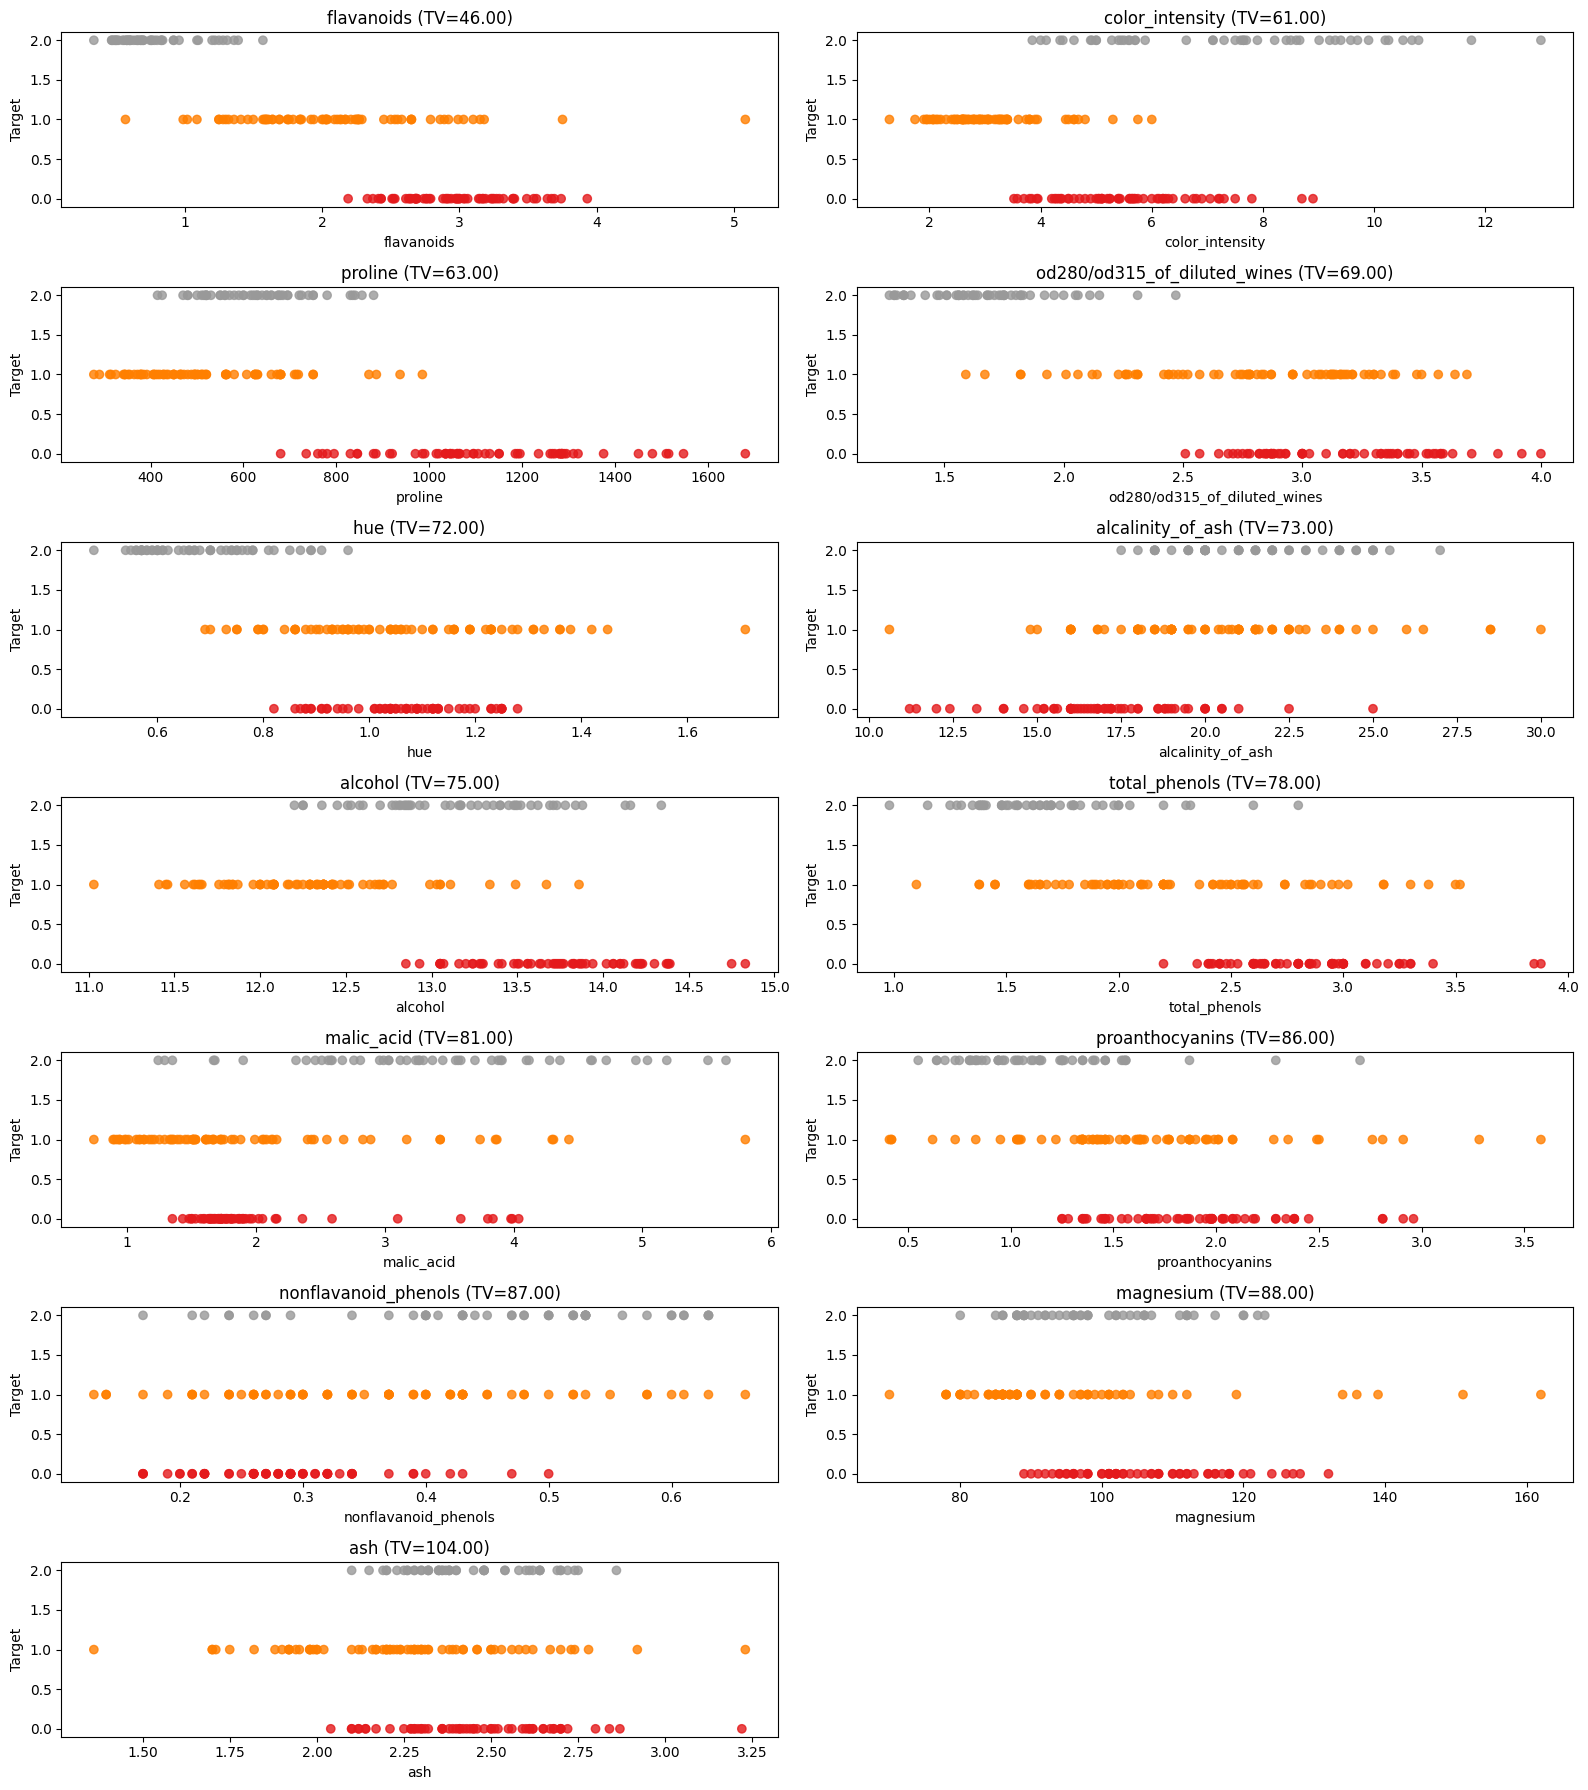

In [23]:
# Sort features by total variation (TV), ascending
sorted_features = sorted(tv_wine, key=tv_wine.get)

fig, axes = plt.subplots(7, 2, figsize=(16, 18))
axes = axes.flatten()

for i, feature in enumerate(sorted_features):
    X_feature = X_wine[[feature]]
    sorted_index = np.argsort(X_feature.values.ravel())

    x_vals = X_feature.values.ravel()[sorted_index]
    y_vals = y_wine[sorted_index]

    axes[i].scatter(x_vals, y_vals, c=y_vals, cmap='Set1', alpha=0.8)
    axes[i].set_title(f"{feature} (TV={tv_wine[feature]:.2f})")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Target")

# Turn off unused axes (in case features < subplots)
for j in range(len(wine_features), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()
